In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress


# Lab 10

## Part 1A

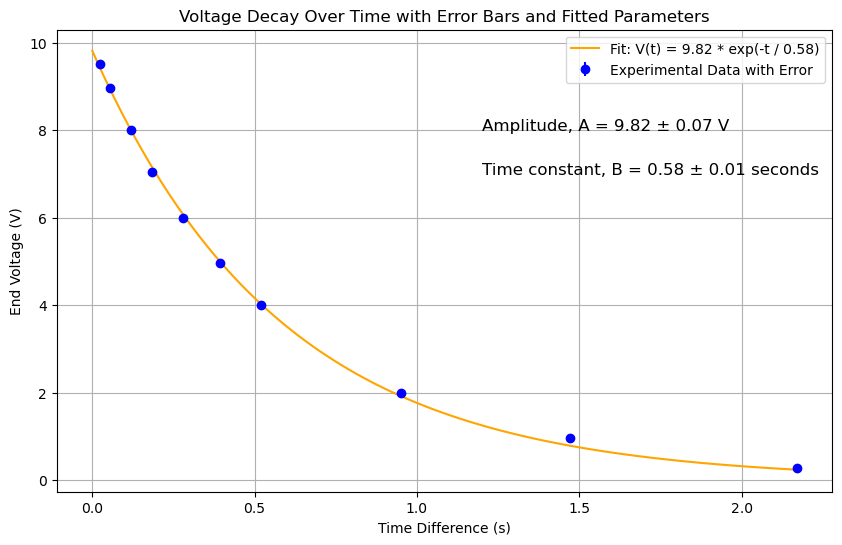

(9.81999987700435, 0.5825068678593872, array([0.06668912, 0.01011174]))

In [33]:
df = pd.read_csv('part1a.csv')

# Convert Time Difference to seconds for fitting
df['Time Difference (s)'] = df['Time Difference (ms)'] / 1000

# Define the discharging model V(t) = A * exp(-t/B)
def discharging_model(t, A, B):
    return A * np.exp(-t / B)

# Fit the data to the discharging model
popt, pcov = curve_fit(discharging_model, df['Time Difference (s)'], df['End Voltage (V)'])
A, B = popt  # Amplitude and time constant

# Calculate the errors from the covariance matrix
errors = np.sqrt(np.diag(pcov))

# Generate theoretical output for plotting
time_values = np.linspace(0, df['Time Difference (s)'].max(), 100)
theoretical_voltage = discharging_model(time_values, A, B)

plt.figure(figsize=(10, 6))
plt.errorbar(df['Time Difference (s)'], df['End Voltage (V)'], yerr=errors[0], fmt='o', label='Experimental Data with Error', color='blue')
plt.plot(time_values, theoretical_voltage, label=f'Fit: V(t) = {A:.2f} * exp(-t / {B:.2f})', color='orange')

# Adding the equations as text annotations on the plot
plt.text(1.2, 8, f'Amplitude, A = {A:.2f} ± {errors[0]:.2f} V', fontsize=12, color='black')
plt.text(1.2, 7, f'Time constant, B = {B:.2f} ± {errors[1]:.2f} seconds', fontsize=12, color='black')

plt.xlabel('Time Difference (s)')
plt.ylabel('End Voltage (V)')
plt.title('Voltage Decay Over Time with Error Bars and Fitted Parameters')
plt.legend()
plt.grid(True)
plt.show()

# Output the fit parameters and their errors
A, B, errors


### Residual Plot Part 1a

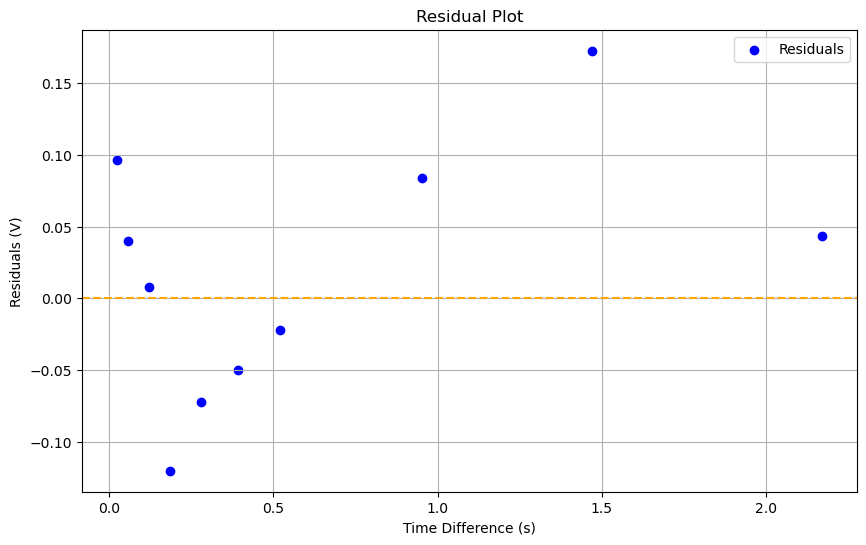

In [3]:
residuals = df['End Voltage (V)'] - discharging_model(df['Time Difference (s)'], A, B)

plt.figure(figsize=(10, 6))
plt.scatter(df['Time Difference (s)'], residuals, color='blue', label='Residuals')
plt.axhline(0, color='orange', linestyle='--')
plt.xlabel('Time Difference (s)')
plt.ylabel('Residuals (V)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

# Part 1b

### Equation for Fitting

The discharging voltage $V(t)$ of a capacitor over time in an RC circuit follows an exponential decay:

$V(t) = V_0 e^{-\frac{t}{RC}}$

where:
- $V(t)$ is the voltage at time $t$,
- $V_0$ is the initial voltage,
- $R$ is the resistance,
- $C$ is the capacitance.

### Linearized Form

To fit this data linearly, we take the natural logarithm of both sides:

$\ln(V(t)) = \ln(V_0) - \frac{t}{RC}$

This can be rearranged into the linear form:

$\ln(V(t)) = -\frac{1}{RC} \cdot t + \ln(V_0)$

where:
- $\ln(V(t))$ corresponds to the $y$-axis,
- $t$ corresponds to the $x$-axis,
- The slope $m = -\frac{1}{RC}$.

### Capacitance

Given slope is $m = -\frac{1}{RC}$, the capacitance $C$ is:

$C = -\frac{1}{R \cdot \text{slope}}$



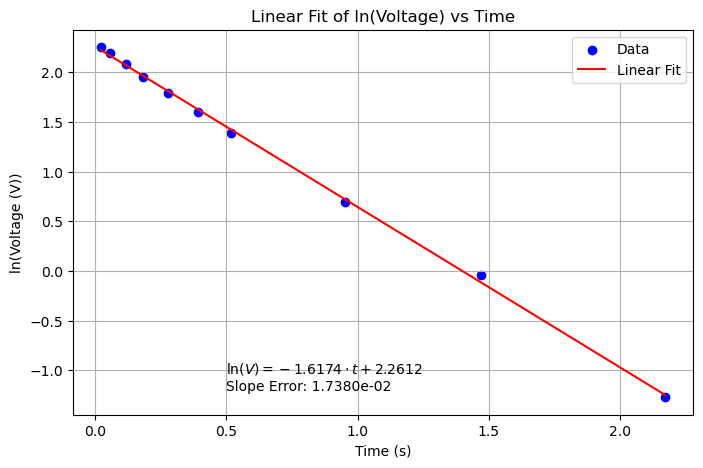

6.182749773270222e-05

In [4]:
df["Time (s)"] = df["Time Difference (ms)"] / 1000
df["ln(Voltage)"] = np.log(df["End Voltage (V)"])

# Perform linear regression to get slope, intercept, and their standard errors
slope, intercept, r_value, p_value, std_err = linregress(df["Time (s)"], df["ln(Voltage)"])

# Calculate capacitance using the slope
R = 10 * 10**3  # 10 kOhms in Ohms
C_from_slope = -1 / (R * slope)

# Display the plot with equation and errors
plt.figure(figsize=(8, 5))
plt.scatter(df["Time (s)"], df["ln(Voltage)"], label="Data", color="blue")
plt.plot(df["Time (s)"], slope * df["Time (s)"] + intercept, label="Linear Fit", color="red")

# Adding equation with slope and intercept errors to the plot
equation_text = f"$\ln(V) = {slope:.4f} \cdot t + {intercept:.4f}$\nSlope Error: {std_err:.4e}"
plt.text(0.5, -1.2, equation_text, fontsize=10, color="black")
plt.xlabel("Time (s)")
plt.ylabel("ln(Voltage (V))")
plt.title("Linear Fit of ln(Voltage) vs Time")
plt.legend()
plt.grid(True)
plt.show()

C_from_slope

## Calculating Capacitance

In [5]:
R = 10 * 10**3  # 10 kOhms in Ohms
C_from_slope = -1 / (R * slope)

C_from_slope

6.182749773270222e-05

## Residual Plot

# Part 2A

The equation used for the underdamped RLC circuit transient response was:

$I(t) = e^{-\alpha t} \left( A \cos(\omega t) + B \sin(\omega t) \right)$

After fitting the data, the fitted parameters are:

- $\alpha = 0.0009 \pm 0.0001$
- $\omega = 0.0097 \pm 0.0003$
- $A = -0.2609 \pm 2.2333$
- $B = 2.0498 \pm 0.4922$

F|itted equation becomes:

$I(t) = e^{-0.0009 \, t} \left( -0.2609 \cos(0.0097 \, t) + 2.0498 \sin(0.0097 \, t) \right)$

$V(t) = I(t)R$
$I(t) = V(t)/R$

Alpha:  903.819292087775 111.1120362779502
Omega:  -9698.312136805103 530.6385621766697
Phi:  -26.69818637661881 0.6061506307302298


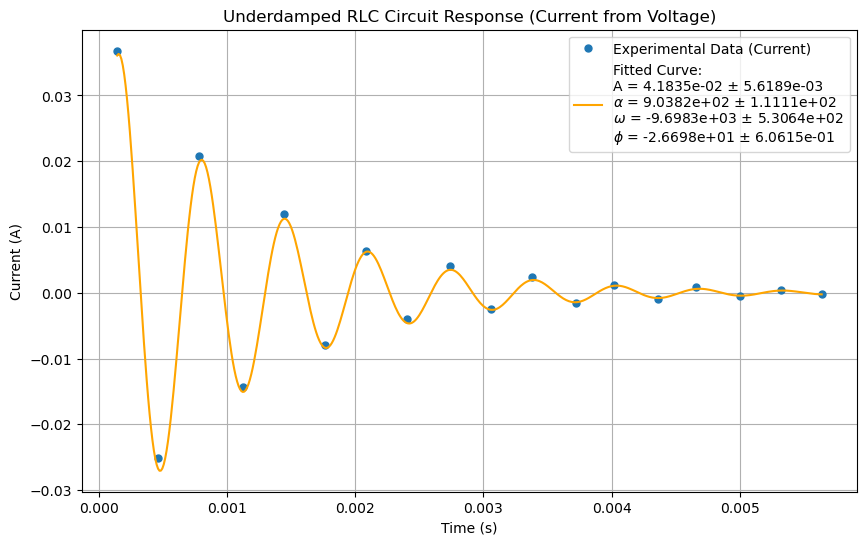

In [34]:
time = np.array([140, 780, 1440, 2080, 2740, 3380, 4020, 4660, 5320, 460, 1120, 1760, 2400, 3060, 3720, 4360, 5000, 5640]) / 1000000 # Convert to seconds
voltage = np.array([1.84, 1.04, 0.600, 0.320, 0.200, 0.120, 0.056, 0.040, 0.024, -1.26, -0.720, -0.400, -0.200, -0.120, -0.080, -0.048, -0.024, -0.012])  # Voltage

R = 50  # Ohms

# Calculate the current from the voltage
current = voltage / R

# Define the underdamped model function
def underdamped_model(t, A, alpha, omega, phi):
    return A * np.exp(-alpha * t) * np.cos(omega * t - phi)

initial_guess = [0.05, 100, 10, 0]

params, covariance = curve_fit(underdamped_model, time, current, p0=initial_guess, maxfev=10000)

A_fit, alpha_fit, omega_fit, phi_fit = params
A_error, alpha_error, omega_error, phi_error = np.sqrt(np.diag(covariance))

time_fine = np.linspace(time.min(), time.max(), 500)
current_fitted = underdamped_model(time_fine, A_fit, alpha_fit, omega_fit, phi_fit)


plt.figure(figsize=(10, 6))
plt.plot(time, current, 'o', label='Experimental Data (Current)', markersize=5)
plt.plot(time_fine, current_fitted, color='orange', 
         label=f'Fitted Curve:\nA = {A_fit:.4e} ± {A_error:.4e}\n'
               f'$\\alpha$ = {alpha_fit:.4e} ± {alpha_error:.4e}\n'
               f'$\\omega$ = {omega_fit:.4e} ± {omega_error:.4e}\n'
               f'$\\phi$ = {phi_fit:.4e} ± {phi_error:.4e}')

print("Alpha: ", alpha_fit, alpha_error)
print('Omega: ', omega_fit, omega_error)
print('Phi: ', phi_fit, phi_error)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Underdamped RLC Circuit Response (Current from Voltage)')
plt.legend()
plt.grid(True)
plt.show()


# Part 2B

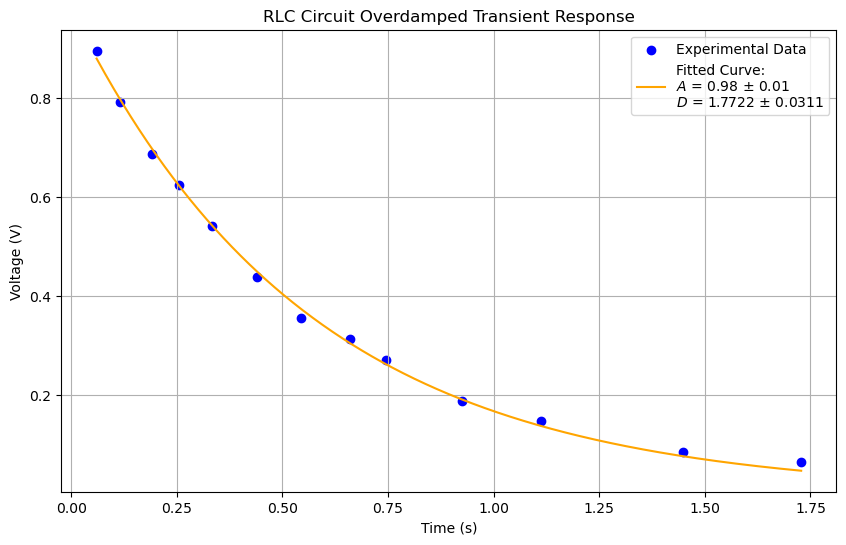

In [31]:
df = pd.read_csv('part2b.csv')
time = df["Time Difference (ms)"].values/1000
voltage = df["End Voltage (V)"].values/3.84

# Define the decay model function
def decay_model(t, A, D):
    return A * np.exp(-D * t)

# Initial guess for parameters [A, D]
initial_guess = [voltage[0], 0.01]

# Fit the data
params, covariance = curve_fit(decay_model, time, voltage, p0=initial_guess)

# Extract the fitted parameters and their standard errors
A_fit, D_fit = params
A_error, D_error = np.sqrt(np.diag(covariance))

# Generate fitted curve data
time_fine = np.linspace(time.min(), time.max(), 500)
voltage_fitted = decay_model(time_fine, A_fit, D_fit)

# Plotting the experimental data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(time, voltage, label='Experimental Data', color='blue')
plt.plot(time_fine, voltage_fitted, color='orange', label=f'Fitted Curve:\n$A$ = {A_fit:.2f} ± {A_error:.2f}\n$D$ = {D_fit:.4f} ± {D_error:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RLC Circuit Overdamped Transient Response')
plt.legend()
plt.grid(True)
plt.show()